In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import copy

## import the library below:

In [2]:
from PyEyeSim import EyeData


In [3]:
%load_ext autoreload
%autoreload 2

## download data if necessary

## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [4]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'FixDatUrban.csv'
FixData=pd.read_csv(FilePath)
print(np.shape(FixData))


(29324, 17)


In [5]:
FixData=FixData[FixData.age>0]

## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (21165, 17)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 40 subjects, and 64 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
1.0
stimulus size in y is full screen
stimulus size in x full screen
 
2.0
stimulus size in y is full screen
stimulus size in x full screen
 
3.0
stimulus size in y is full screen
stimulus size in x full screen
 
4.0
stimulus size in y is full screen
stimulus size in x full screen
 
5.0
stimulus size in y is full screen
stimulus size in x full screen
 
6.0
stimulus size in y is full screen
stimulus size in x full screen
 
7.0
stimulus size in y is full screen
stimulus size in x f

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
        45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
        58.]))

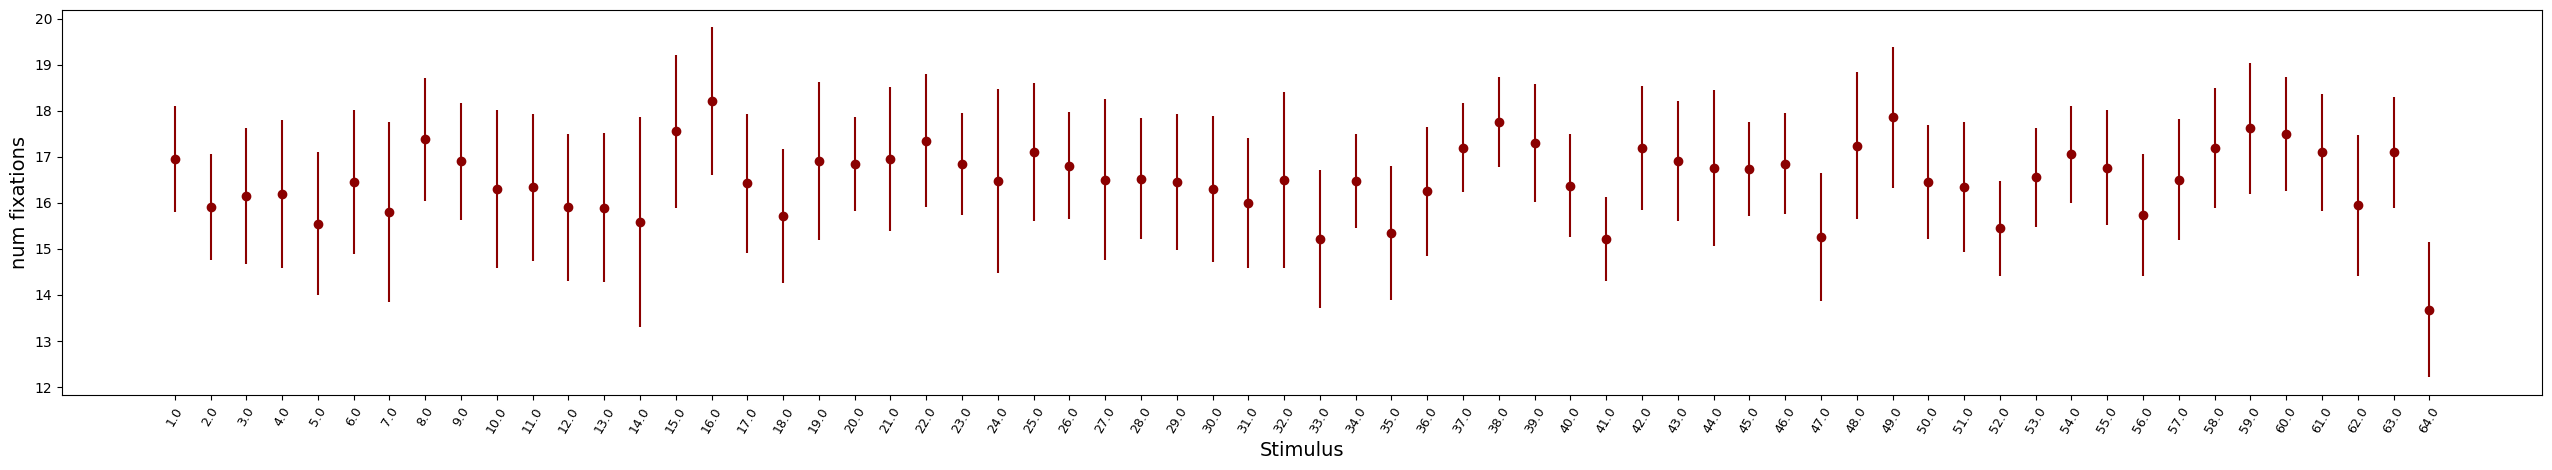

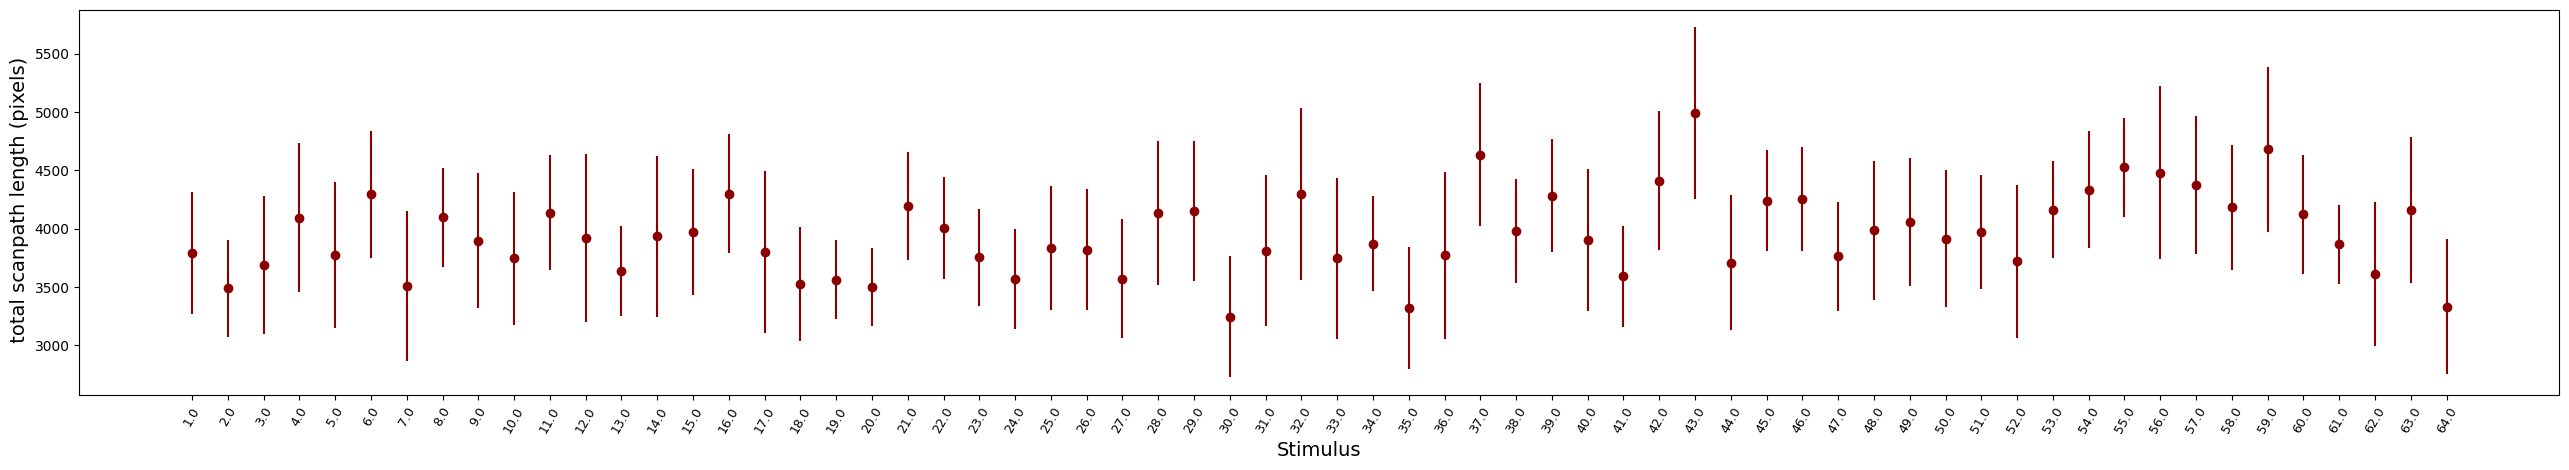

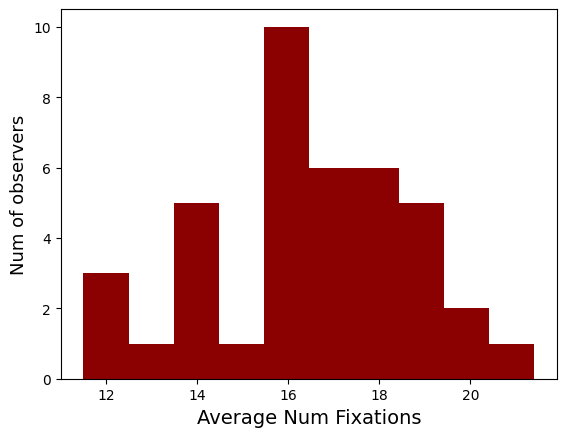

In [6]:

sizeX,sizeY=1280,960


UrbanDat=EyeData(FixData,sizeX,sizeY)
UrbanDat.DataInfo(FixDuration='length',Stimulus='filenumber',subjectID='SUBJECTINDEX',StimPath=Path+'8/',StimExt='.png')
UrbanDat.RunDescriptiveFix(Visual=1)


### scanpath group similarity

since the measure is not symmetric, we calculate the similarity of pairs of participants within group 1, between group 1 and 2, between group 2 and 1, and finally between pairs of participants in group 2.

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


Conditions [1. 2.]


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:238: RuntimeWarning: Mean of empty slice
  Vals=np.nanmean(np.nanmean(SimSacP[Idxs[cgr1],:,stimn,:,:][:,Idxs[cgr2],:,:],0),0)


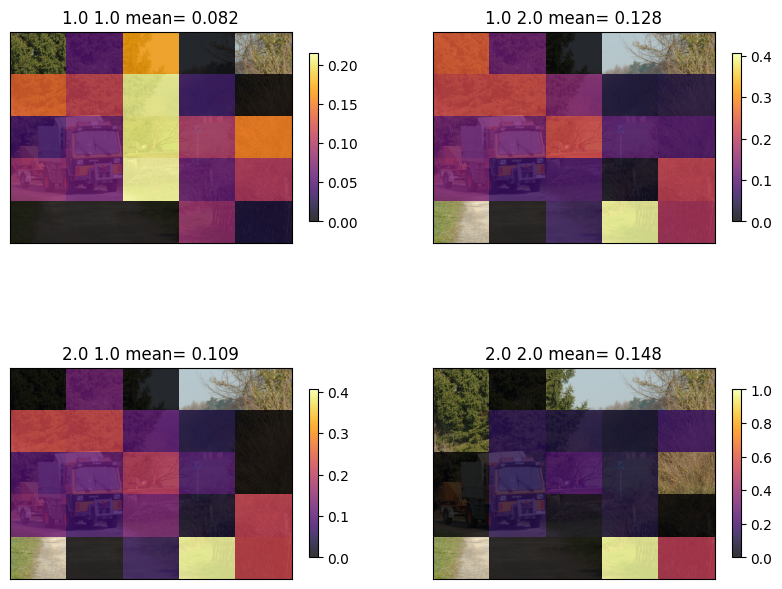

In [7]:
stimn=1
SimVals,SimValsSD=UrbanDat.ScanpathSim2Groups(UrbanDat.stimuli[stimn],'age',normalize='mult')

1. There are other normalizations that can be applied to the similarity measure?

2. How we can actually measure withc normailzation is the best?

3. The similarity measure can be used to calculate the similarity of the scanpath of a single participant to the group. This can be done by calculating the similarity of the scanpath of the participant to each of the other participants in the group and then averaging the similarity values. This will give a measure of how similar the scanpath of the participant is to the group as a whole.


For HMM:

1. Is possible to create a similarity measure for the HMM model?
    - We could do this by comparing the transition probabilities of the HMM model for each participant to the transition probabilities of the group model. This would give a measure of how similar the HMM model of the participant is to the group model.
    - We could also compare the result of GaussianHMMPipeline between the two groups, to see if the best number of components is the same for both groups or not.

### HMM group similarity

In the fist case we execute the pipeline to get the best number of components for each group, and then we compare the results.

In [8]:
stim = 1
WhichC,WhichCN = UrbanDat.GetGroups('age',stim)
Conditions=UrbanDat.Conds
print(f'num observers in group 1: {np.sum(WhichCN==Conditions[0])}') 
print(f'num observers in group 2: {np.sum(WhichCN==Conditions[1])}')

GroupFix=[]

for cc,c in enumerate(UrbanDat.Conds):
    Idx=np.nonzero(WhichC==cc)[0]
    FixGr=np.array(UrbanDat.nfix[Idx,:])
    print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))

Conditions [1. 2.]
num observers in group 1: 12
num observers in group 2: 9
0 1.0 Num fix=  16.81 +/- 1.92
1 2.0 Num fix=  17.06 +/- 2.04


Model is not converging.  Current: -2492.0135312522802 is not greater than -2487.9270707086444. Delta is -4.086460543635894


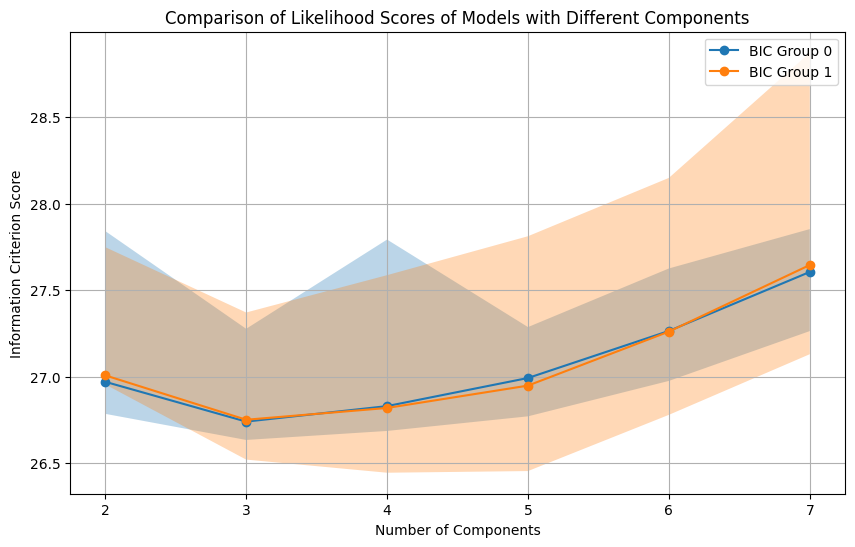

In [9]:
results = UrbanDat.models_pipeline(stim, [2,3,4,5,6,7], group=[0,1], n_iter=100, starting_tests=100, only_starting=True, only_bic=True)

Now we define the function to calculate the similarity between the two groups.

1. We need a function to caluclate the difference between the transition probabilities of the two models.
    - We use the Frobenius norm to calculate the difference between the two matrices.
        - The Frobenius norm of two matrices A and B is defined as the square root of the sum of the squares of the differences between the corresponding elements of the two matrices. ie ||A - B||_F = sqrt(sum((A - B)^2))

2. We need a function to calculate the difference between the emission probabilities of the two models.
    - As we have always a 2D array, we can use the euclidean distance to calculate the difference between the two matrices.
        - The euclidean distance between two matrices A and B is defined as the square root of the sum of the squares of the differences between the corresponding elements of the two matrices. ie ||A - B||_2 = sqrt(sum((A - B)^2))

3. We need a function to calculate the difference between the covariance matrices of the two models.
    - As the covariance matrices are eliptical, we computes the difference in shape and orientation
    between two covariance matrices (2x2)

- A score is calculated for each of the three differences (between 0 and 1)
    - when the two matrices are identical the score is 0
    - when the two matrices are highly dissimilar the score is 1

Note:

- The Transition matrix is a square matrix that gives the probability of transitioning from one state to another.
- The Mean matrix is a matrix that gives the mean of the observation in each state.
    - In our case the mean matrix is a 2d matrix that correspond to the center of the eliptical shape.
- The Covariance matrix is a matrix that gives the covariance between the two dimensions of the observation.
    - In our case the covariance matrix is a 2d matrix that correspond to an eliptical shape.

In [10]:
def norm_diff(matrix1, matrix2):
    """
    Computes the normalized norm of the difference between two matrices, ensuring the score is between 0 and 1.
    
    Parameters:
    matrix1, matrix2: The matrices to compare.
    
    Returns:
    float: The normalized norm of the difference.
    """
    diff_norm = np.linalg.norm(matrix1 - matrix2)
    normalization_factor = np.linalg.norm(matrix1) + np.linalg.norm(matrix2)
    
    if normalization_factor == 0:
        return 0
    
    return diff_norm / normalization_factor

def euclidean_distance(v1, v2):
    """
    Computes the Euclidean distance between two 2D vectors.
    
    Parameters:
    v1, v2: The vectors to compare.
    
    Returns:
    float: The Euclidean distance.
    """
    return np.linalg.norm(v1 - v2)

def normalize_means_score(mean_diff, mean1, mean2):
    """
    Normalize the mean difference score based on a given factor.
    
    Parameters:
    mean_diff: The Euclidean distance between the means of two models.
    normalization_factor: The factor to normalize the score.
    
    Returns:
    float: The normalized means score.
    """
    norm_mean1 = np.linalg.norm(mean1)
    norm_mean2 = np.linalg.norm(mean2)
    
    # Use the larger of the two norms for normalization, ensuring the score remains <= 1
    normalization_factor = max(norm_mean1, norm_mean2)
    
    if normalization_factor == 0:
        return 0  # If both means are zero, they are identical.
    
    return mean_diff / normalization_factor

def covariance_shape_and_orientation_diff(cov1, cov2):
    """
    Computes a normalized score that represents the difference in shape and orientation
    between two covariance matrices (2x2), ensuring the score is between 0 and 1.
    
    Parameters:
    cov1, cov2: The 2x2 covariance matrices to compare.
    
    Returns:
    float: A normalized score representing the difference between the shapes and orientations of the ellipses.
    """
    # If covariances are identical, return 0
    if np.allclose(cov1, cov2):
        return 0 

    # Get the eigenvalues and eigenvectors (shape and orientation) for each covariance matrix
    eigvals1, eigvecs1 = np.linalg.eigh(cov1)
    eigvals2, eigvecs2 = np.linalg.eigh(cov2)
    
    # 1. Shape difference: Compare the eigenvalues (semi-axes lengths of the ellipses)
    # Normalize by the sum of the eigenvalues
    shape_diff = np.abs(eigvals1 - eigvals2) / (np.abs(eigvals1) + np.abs(eigvals2))
    shape_score = np.sum(shape_diff)  # Aggregate the normalized differences
    
    # 2. Orientation difference: Compare the eigenvectors (directions of the semi-axes)
    # Compute the cosine of the angle between the two corresponding eigenvectors
    orientation_diff = np.abs(np.dot(eigvecs1[:, 0], eigvecs2[:, 0]))  # Cosine of the angle between principal axes
    orientation_score = 1 - orientation_diff  # Normalize to be in range [0, 1]
    
    # Combine shape and orientation scores
    total_score = (shape_score + orientation_score) / (shape_score + orientation_score + 1)
    
    return total_score

def compare_hmm_models_with_scores(hmm_models):
    """
    Compares the key matrices (transition matrix, means, covariances) of a list of GaussianHMM models,
    and adds a score indicating the similarity of the matrices.
    
    Parameters:
    hmm_models (list): A list of GaussianHMM models to compare.
    
    Returns:
    dict: A dictionary containing the pairwise differences and similarity scores for each matrix type.
    """
    n_models = len(hmm_models)
    results = {
        'transition_diff': [],
        'means_diff': [],
        'covariances_diff': [],
        'transition_scores': [],
        'means_scores': [],
        'covariances_scores': []
    }
    
    # Compare each pair of models
    for i in range(n_models):
        for j in range(i + 1, n_models):
            model1 = hmm_models[i]
            model2 = hmm_models[j]
            
            # Compare transition matrices
            transition_diff = model1.transmat_ - model2.transmat_
            transition_score = norm_diff(model1.transmat_, model2.transmat_)
            results['transition_diff'].append((i, j, transition_diff))
            results['transition_scores'].append((i, j, transition_score))
            
            # Compare means (Euclidean distance for 2D means)   
            for i in range(len(hmm_models)):
                for j in range(i + 1, len(hmm_models)):
                    means_score = 0
                    for state in range(len(hmm_models[i].means_)):
                        mean_diff = euclidean_distance(hmm_models[i].means_[state], hmm_models[j].means_[state])
                        score = normalize_means_score(mean_diff, hmm_models[i].means_[state], hmm_models[j].means_[state])
                        means_score += score
                    results['means_scores'].append((i, j, means_score / len(hmm_models[i].means_)))
            
            # Compare covariances (shape and orientation of the ellipses)
            covariances_score = 0
            for state in range(len(model1.covars_)):
                covariances_score += covariance_shape_and_orientation_diff(model1.covars_[state], model2.covars_[state])
            
            covariances_score /= len(model1.covars_)
            results['covariances_scores'].append((i, j, covariances_score))
    
    return results

def format_comparison_results_with_scores(comparison_results):
    """
    Formats the comparison results of HMM models into a readable format, including similarity scores.
    
    Parameters:
    comparison_results (dict): The dictionary returned from the compare_hmm_models_with_scores function.
    
    Returns:
    str: A formatted string showing the pairwise differences and similarity scores.
    """
    formatted_output = []
    
    # Format transition matrix differences and scores
    formatted_output.append("Transition Matrix Differences and Scores:\n")
    for (i, j, diff) in comparison_results['transition_diff']:
        score = [s for s in comparison_results['transition_scores'] if s[0] == i and s[1] == j][0][2]
        formatted_output.append(f"Model {i} vs Model {j} Transition Matrix Difference:\n{diff}\n")
        formatted_output.append(f"Similarity Score: {score:.4f}\n\n")
    
    # Format means differences and scores
    formatted_output.append("Means Differences and Scores:\n")
    for (i, j, score) in comparison_results['means_scores']:
        formatted_output.append(f"Model {i} vs Model {j} Means Similarity Score: {score:.4f}\n")

    formatted_output.append("\n")

    # Format covariances differences and scores
    formatted_output.append("Covariances Differences and Scores:\n")
    for (i, j, score) in comparison_results['covariances_scores']:
        formatted_output.append(f"Model {i} vs Model {j} Covariances Similarity Score: {score:.4f}\n")
    
    return ''.join(formatted_output)

In [11]:
# Check that the results are as expected (two identical models should have similarity scores of 0)
results_with_scores = compare_hmm_models_with_scores([results[0][0][1], results[0][0][1]])

# Format the results with scores
formatted_results_with_normalized_scores  = format_comparison_results_with_scores(results_with_scores)
print(formatted_results_with_normalized_scores)

Transition Matrix Differences and Scores:
Model 0 vs Model 1 Transition Matrix Difference:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Similarity Score: 0.0000

Means Differences and Scores:
Model 0 vs Model 1 Means Similarity Score: 0.0000

Covariances Differences and Scores:
Model 1 vs Model 1 Covariances Similarity Score: 0.0000



In [12]:
hmm_models = [results[0][0][1], results[1][0][1]]

# Compare the models
results_with_scores = compare_hmm_models_with_scores(hmm_models)

# Format the results with scores
formatted_results_with_normalized_scores  = format_comparison_results_with_scores(results_with_scores)
print(formatted_results_with_normalized_scores)

Transition Matrix Differences and Scores:
Model 0 vs Model 1 Transition Matrix Difference:
[[-0.15340679  0.06779837  0.08560842]
 [-0.04271461 -0.00761775  0.05033236]
 [ 0.09934615 -0.04508639 -0.05425976]]
Similarity Score: 0.0830

Means Differences and Scores:
Model 0 vs Model 1 Means Similarity Score: 0.3731

Covariances Differences and Scores:
Model 1 vs Model 1 Covariances Similarity Score: 0.6023



In [13]:
hmm_models = [results[0][0][2], results[1][0][2]]

# Compare the models
results_with_scores = compare_hmm_models_with_scores(hmm_models)

# Format the results with scores
formatted_results_with_normalized_scores  = format_comparison_results_with_scores(results_with_scores)
print(formatted_results_with_normalized_scores)

Transition Matrix Differences and Scores:
Model 0 vs Model 1 Transition Matrix Difference:
[[-2.47099102e-01  1.80217801e-02  2.29077322e-01 -6.92677649e-11]
 [-2.31664937e-01  9.96410658e-02 -5.47122249e-02  1.86736096e-01]
 [ 2.49438411e-01 -2.02145660e-01 -2.85844444e-01  2.38551692e-01]
 [ 1.15511839e-01  1.80962912e-01 -1.12248912e-10 -2.96474752e-01]]
Similarity Score: 0.2524

Means Differences and Scores:
Model 0 vs Model 1 Means Similarity Score: 0.2817

Covariances Differences and Scores:
Model 1 vs Model 1 Covariances Similarity Score: 0.5049



Looking to the results we can see that the transition matrix is not too different between the two groups, but the emission and covariance matrices are quite different.

Lets proceed to investigate the difference in using 4 components for the two groups.

In [14]:
# need to create a deep copy *(ie a new separate object) of the original models before modifying them
# otherwise, the modifications will be applied to the original models as well
original1 = copy.deepcopy(results[0][0][2])
original2 = copy.deepcopy(results[1][0][2])

In [18]:
grop1_comp4 = UrbanDat.models_pipeline(stim, [4], group=1, evaluation=['lda','bic'], n_iter=100, iteration=100, models=[results[1][0][2]], simulation_type='max')

In [19]:
grop0_comp4 = UrbanDat.models_pipeline(stim, [4], group=0, evaluation=['lda','bic'], n_iter=100, iteration=100, models=[results[0][0][2]], simulation_type='max')

In [20]:
# Compare the models
results_with_scores = compare_hmm_models_with_scores([grop0_comp4[0][0][0], grop1_comp4[0][0][0]])

# Format the results with scores
formatted_results_with_normalized_scores  = format_comparison_results_with_scores(results_with_scores)
print(formatted_results_with_normalized_scores)

Transition Matrix Differences and Scores:
Model 0 vs Model 1 Transition Matrix Difference:
[[ 7.36190120e-86 -2.07857335e-02 -5.00379420e-03  2.57895277e-02]
 [-9.09224730e-01 -1.03244588e-32  1.09712291e-01  7.99512439e-01]
 [-6.01895651e-01  1.58046166e-01  5.86267231e-02  3.85222761e-01]
 [-5.84332409e-01  1.70544198e-01  4.13788212e-01 -2.17082783e-21]]
Similarity Score: 0.4624

Means Differences and Scores:
Model 0 vs Model 1 Means Similarity Score: 0.5122

Covariances Differences and Scores:
Model 1 vs Model 1 Covariances Similarity Score: 0.6655



In [21]:
# Compare the models
results_with_scores = compare_hmm_models_with_scores([original1, grop0_comp4[0][0][0]])

# Format the results with scores
formatted_results_with_normalized_scores  = format_comparison_results_with_scores(results_with_scores)
print(formatted_results_with_normalized_scores)

Transition Matrix Differences and Scores:
Model 0 vs Model 1 Transition Matrix Difference:
[[ 0.56709843  0.06881366  0.34862637 -0.98453847]
 [ 0.05557556  0.75768835 -0.10971229 -0.70355161]
 [-0.14866592 -0.08305476  0.34678529 -0.11506461]
 [-0.20737095 -0.08236608 -0.41378821  0.70352525]]
Similarity Score: 0.6229

Means Differences and Scores:
Model 0 vs Model 1 Means Similarity Score: 0.4062

Covariances Differences and Scores:
Model 1 vs Model 1 Covariances Similarity Score: 0.6479



In [22]:
# Compare the models
results_with_scores = compare_hmm_models_with_scores([original2, grop1_comp4[0][0][0]])

# Format the results with scores
formatted_results_with_normalized_scores  = format_comparison_results_with_scores(results_with_scores)
print(formatted_results_with_normalized_scores)

Transition Matrix Differences and Scores:
Model 0 vs Model 1 Transition Matrix Difference:
[[ 8.14197537e-01  3.00061459e-02  1.14545256e-01 -9.58748938e-01]
 [-6.21984235e-01  6.58047280e-01  5.47122249e-02 -9.07752705e-02]
 [-9.99999982e-01  2.77137065e-01  6.91256455e-01  3.16064619e-02]
 [-9.07215201e-01 -9.27847993e-02  1.12248912e-10  1.00000000e+00]]
Similarity Score: 0.6784

Means Differences and Scores:
Model 0 vs Model 1 Means Similarity Score: 0.4444

Covariances Differences and Scores:
Model 1 vs Model 1 Covariances Similarity Score: 0.6780



After the fitting and simulating process is possible to notice that the transation matrix between the original and final moder differs a lot also the covariance matrix get a high dissimilarity, instead for the emission matrix the difference is not so high.

Comparing the two new models we can see that the transition matrix is more similar (in comparison with the corrispndent original model) but the means and covariance matrices are highly dissimilar.

Is interesting to notice that the models are soo different compared to the original ones, maybe the simulation type equal to 'max' is not the best choice.

We can also proceed to plot the scanpath of the models to have a visual comparison.

In [23]:
def plot_multiple_simulations(self, stim_list, models_list, simulated_X_list, simulated_Y_list, n_components_list_list, new_list_len_list):
    """
    Plot a 2x2 grid of simulated data for multiple sets of inputs.

    Parameters
    ----------
    stim_list : list
        List of stimulus numbers for each set of data (length 4).
        
    models_list : list
        List of lists, where each sublist contains fitted GaussianHMM models for each set of data.
        
    simulated_X_list : list
        List of lists of simulated X-axis eye movement data for each set of data.
        
    simulated_Y_list : list
        List of lists of simulated Y-axis eye movement data for each set of data.
        
    n_components_list_list : list
        List of lists, where each sublist contains the numbers of components for each set of data.
        
    new_list_len_list : list
        List of lists of fixation lengths for each scanpath for each set of data.
    """

    # if all the same stimulus, make the int a list
    if isinstance(stim_list, int):
        stim_list = [stim_list for _ in range(4)]

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    fig.suptitle('Comparison of Simulated Data for Different Models', fontsize=18)

    # Flatten the axes for easier access in a loop
    axes = axes.ravel()

    for i in range(4):
        stim = stim_list[i]
        models = models_list[i]
        simulated_X = simulated_X_list[i]
        simulated_Y = simulated_Y_list[i]
        n_components_list = n_components_list_list[i]
        new_list_len = new_list_len_list[i]

        axes[i].set_title(f'Simulated Fixation for Model {i}', fontsize=12)

        for j, (n_components, sim_X, sim_Y, model) in enumerate(zip(n_components_list, simulated_X, simulated_Y, models)):
            self.VisHMM(np.column_stack((sim_X, sim_Y)), model, ax=axes[i], stim=stim, lengths=new_list_len)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [24]:
results[0][0][2] = original1
results[1][0][2] = original2

In [25]:
_,_,l0 = UrbanDat.get_data(stim, group=0)
_,_,l1 = UrbanDat.get_data(stim, group=1)
l0 = UrbanDat.fixation_sequence(l0, method='max')
l1 = UrbanDat.fixation_sequence(l1, method='max')

In [26]:
simulated_data0, simulated0_X, simulated0_Y = UrbanDat.data_simulation([results[0][0][2]],l0)
simulated_data1, simulated1_X, simulated1_Y = UrbanDat.data_simulation([results[1][0][2]],l1)

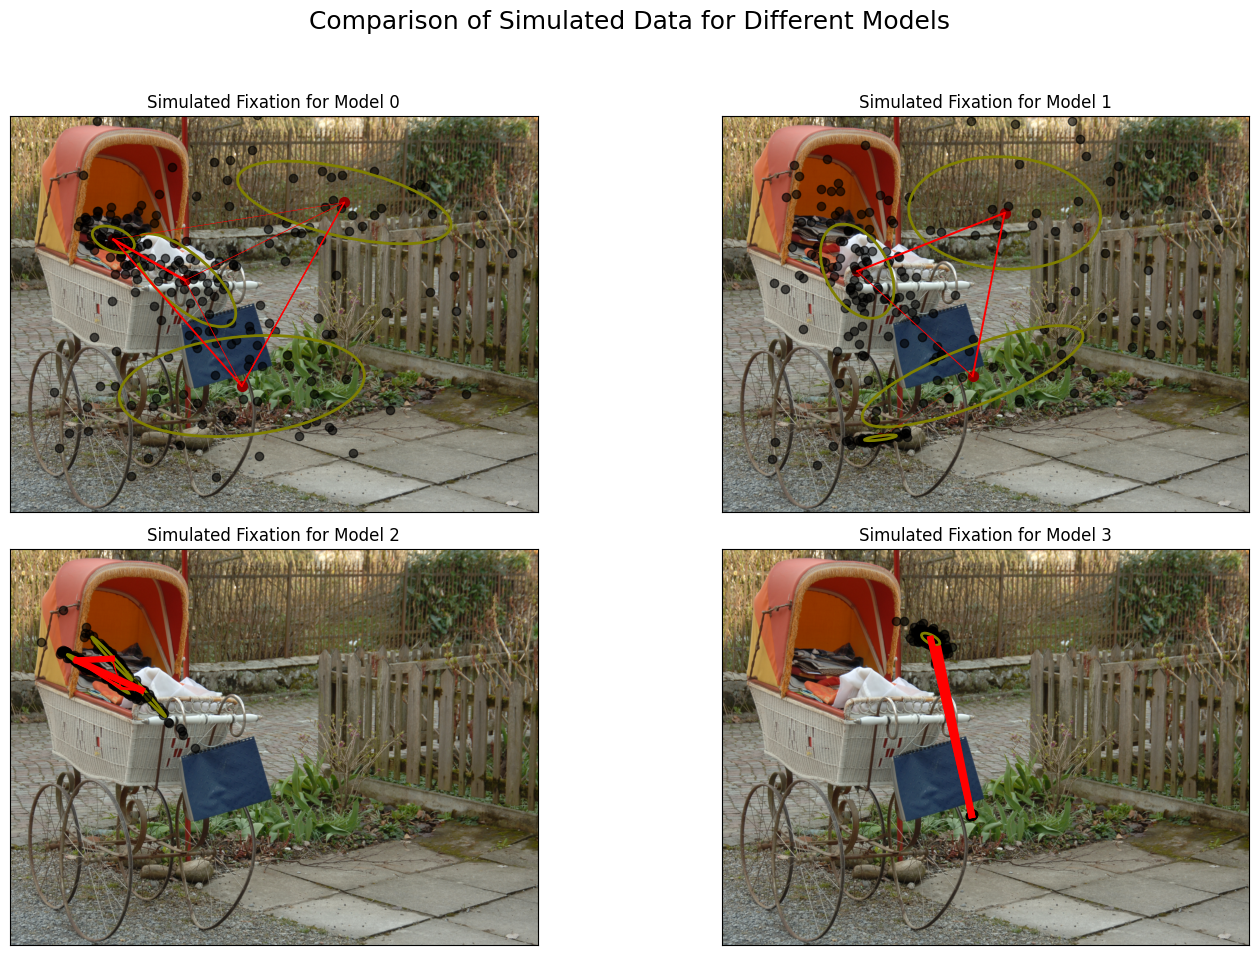

In [28]:
plot_multiple_simulations(UrbanDat, stim, [[results[0][0][2]],[results[1][0][2]],grop0_comp4[0][0],grop1_comp4[0][0]], [simulated0_X,simulated1_X,grop0_comp4[0][1],grop1_comp4[0][1]], [simulated0_Y,simulated1_Y,grop0_comp4[0][2],grop1_comp4[0][2]], [[4],[4],[4],[4]], [l0,l1,l0,l1])

Now its more clear why the models are so different.

Since we reduce the original data, by selecting only the subject with a specific group, and we repete the fitting and simulating process 100 times, we overfit the model.

Lets try again but reducing the generation.

In [44]:

results[0][0][2] = original1
results[1][0][2] = original2

original1 = copy.deepcopy(results[0][0][2])
original2 = copy.deepcopy(results[1][0][2])

t2_group1_comp4 = UrbanDat.models_pipeline(stim, [4], group=1, evaluation=['lda','bic'], n_iter=100, iteration=5, models=[results[1][0][2]], simulation_type='max')
t2_group0_comp4 = UrbanDat.models_pipeline(stim, [4], group=0, evaluation=['lda','bic'], n_iter=100, iteration=5, models=[results[0][0][2]], simulation_type='max')

In [45]:
# Compare the models
results_with_scores = compare_hmm_models_with_scores([t2_group0_comp4[0][0][0], t2_group1_comp4[0][0][0]])

# Format the results with scores
formatted_results_with_normalized_scores  = format_comparison_results_with_scores(results_with_scores)
print(formatted_results_with_normalized_scores)

Transition Matrix Differences and Scores:
Model 0 vs Model 1 Transition Matrix Difference:
[[-2.44007956e-01 -1.61360170e-01  4.05368126e-01 -1.51513819e-23]
 [ 1.43392348e-01  3.78710772e-01 -2.00710149e-01 -3.21392970e-01]
 [ 1.31524971e-01 -5.02335145e-01  2.98722634e-01  7.20875406e-02]
 [-2.80550247e-02  5.00472364e-02 -9.44966320e-07 -2.19912667e-02]]
Similarity Score: 0.3255

Means Differences and Scores:
Model 0 vs Model 1 Means Similarity Score: 0.5254

Covariances Differences and Scores:
Model 1 vs Model 1 Covariances Similarity Score: 0.5480



In [46]:
# Compare the models
results_with_scores = compare_hmm_models_with_scores([original1, t2_group0_comp4[0][0][0]])

# Format the results with scores
formatted_results_with_normalized_scores  = format_comparison_results_with_scores(results_with_scores)
print(formatted_results_with_normalized_scores)

Transition Matrix Differences and Scores:
Model 0 vs Model 1 Transition Matrix Difference:
[[ 8.36396065e-02  6.88136596e-02 -1.52453266e-01  3.06872272e-12]
 [-1.67936038e-01  7.87612188e-02 -2.41683231e-02  1.13343143e-01]
 [ 1.17913459e-01 -1.83561087e-01 -1.32367950e-01  1.98015579e-01]
 [ 4.90833421e-02  8.47210547e-02 -2.20620590e-14 -1.33804397e-01]]
Similarity Score: 0.1633

Means Differences and Scores:
Model 0 vs Model 1 Means Similarity Score: 0.3160

Covariances Differences and Scores:
Model 1 vs Model 1 Covariances Similarity Score: 0.3148



In [47]:
# Compare the models
results_with_scores = compare_hmm_models_with_scores([original2, t2_group1_comp4[0][0][0]])

# Format the results with scores
formatted_results_with_normalized_scores  = format_comparison_results_with_scores(results_with_scores)
print(formatted_results_with_normalized_scores)

Transition Matrix Differences and Scores:
Model 0 vs Model 1 Transition Matrix Difference:
[[ 8.67307530e-02 -1.10568291e-01  2.38375377e-02  7.23364876e-11]
 [ 2.07121246e-01  3.57830925e-01 -1.70166247e-01 -3.94785924e-01]
 [ 1.80771428e-08 -4.83750573e-01  4.52199128e-01  3.15514271e-02]
 [-9.44835220e-02 -4.61946213e-02 -9.44854093e-07  1.40679088e-01]]
Similarity Score: 0.2909

Means Differences and Scores:
Model 0 vs Model 1 Means Similarity Score: 0.3654

Covariances Differences and Scores:
Model 1 vs Model 1 Covariances Similarity Score: 0.5415



Now the results have more sense, the models are more similar to the original ones and the difference between the two groups is more clear.

We can also check the diffenece between the new models with the original of the opposite group.

In [48]:
# Compare the models
results_with_scores = compare_hmm_models_with_scores([original1, t2_group1_comp4[0][0][0]])

# Format the results with scores
formatted_results_with_normalized_scores  = format_comparison_results_with_scores(results_with_scores)
print(formatted_results_with_normalized_scores)

Transition Matrix Differences and Scores:
Model 0 vs Model 1 Transition Matrix Difference:
[[-1.60368349e-01 -9.25465107e-02  2.52914860e-01  3.06872272e-12]
 [-2.45436907e-02  4.57471991e-01 -2.24878472e-01 -2.08049828e-01]
 [ 2.49438429e-01 -6.85896233e-01  1.66354684e-01  2.70103119e-01]
 [ 2.10283174e-02  1.34768291e-01 -9.44966342e-07 -1.55795664e-01]]
Similarity Score: 0.3597

Means Differences and Scores:
Model 0 vs Model 1 Means Similarity Score: 0.4018

Covariances Differences and Scores:
Model 1 vs Model 1 Covariances Similarity Score: 0.5151



In [49]:
# Compare the models
results_with_scores = compare_hmm_models_with_scores([original2, t2_group0_comp4[0][0][0]])

# Format the results with scores
formatted_results_with_normalized_scores  = format_comparison_results_with_scores(results_with_scores)
print(formatted_results_with_normalized_scores)

Transition Matrix Differences and Scores:
Model 0 vs Model 1 Transition Matrix Difference:
[[ 3.30738709e-01  5.07918795e-02 -3.81530588e-01  7.23364876e-11]
 [ 6.37288986e-02 -2.08798470e-02  3.05439017e-02 -7.33929534e-02]
 [-1.31524952e-01  1.85845725e-02  1.53476493e-01 -4.05361135e-02]
 [-6.64284974e-02 -9.62418577e-02  1.12226850e-10  1.62670355e-01]]
Similarity Score: 0.1904

Means Differences and Scores:
Model 0 vs Model 1 Means Similarity Score: 0.5298

Covariances Differences and Scores:
Model 1 vs Model 1 Covariances Similarity Score: 0.4915



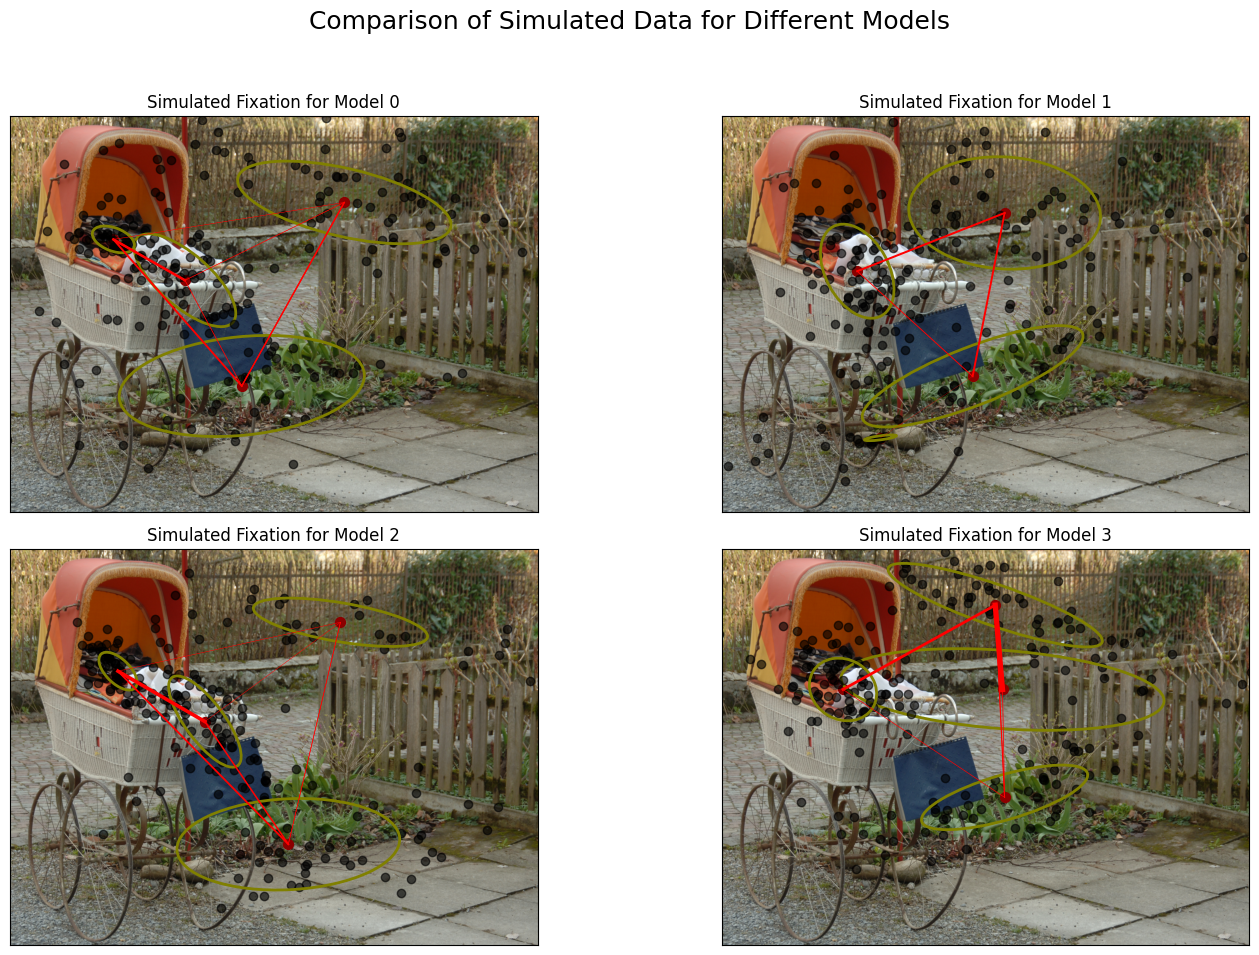

In [50]:
results[0][0][2] = original1
results[1][0][2] = original2
_,_,l0 = UrbanDat.get_data(stim, group=0)
_,_,l1 = UrbanDat.get_data(stim, group=1)
l0 = UrbanDat.fixation_sequence(l0, method='max')
l1 = UrbanDat.fixation_sequence(l1, method='max')
simulated_data0, simulated0_X, simulated0_Y = UrbanDat.data_simulation([results[0][0][2]],l0)
simulated_data1, simulated1_X, simulated1_Y = UrbanDat.data_simulation([results[1][0][2]],l1)
plot_multiple_simulations(UrbanDat, stim, [[results[0][0][2]],[results[1][0][2]],t2_group0_comp4[0][0],t2_group1_comp4[0][0]], [simulated0_X,simulated1_X,t2_group0_comp4[0][1],t2_group1_comp4[0][1]], [simulated0_Y,simulated1_Y,t2_group0_comp4[0][2],t2_group1_comp4[0][2]], [[4],[4],[4],[4]], [l0,l1,l0,l1])